In [2]:
import uproot3
import matplotlib.pyplot as plt
import math
import numpy as np
from   matplotlib import colors


In [3]:

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"]  = (20.0, 20.0)
plt.rcParams["image.origin"]    = 'lower'

In [4]:
Neta    = 96
Nphi    = 256
shape   = (Neta, Nphi)

barrel  = np.zeros(shape, dtype=float)

Ntotal = shape[0]*shape[1]
print("Total channels", Ntotal)

tower_map = np.zeros((Ntotal,2), dtype=int)


for n in range(Ntotal):
    eta = n // Nphi
    phi = n %  Nphi
    tower_map[n] =  [eta, phi]

# print(tower_map)

Total channels 24576


In [5]:
def pseudorap(p):
    pTot = math.sqrt(p[0]**2+p[1]**2+p[2]**2)
    return math.atanh(p[2]/pTot)

def pT(p):
    return math.sqrt(p[0]**2+p[1]**2)

def pTot(p):
    return math.sqrt(p[0]**2+p[1]**2+p[2]**2)

def phiAngle(p):
    res = 0.0
    try:
        res = math.atan(p[1]/p[0])
    except:
        print('Error', p)
    return res


In [6]:
phi_q       = math.pi/128.0
phi_bins    = np.arange(-math.pi+phi_q*0.5, math.pi, phi_q)

# print(phi_bins)

def angle_index(angle, ref_array):
    for i in range(256):
        if math.isclose(angle, ref_array[i], rel_tol=1e-6): return i
    
    return -1


96 256


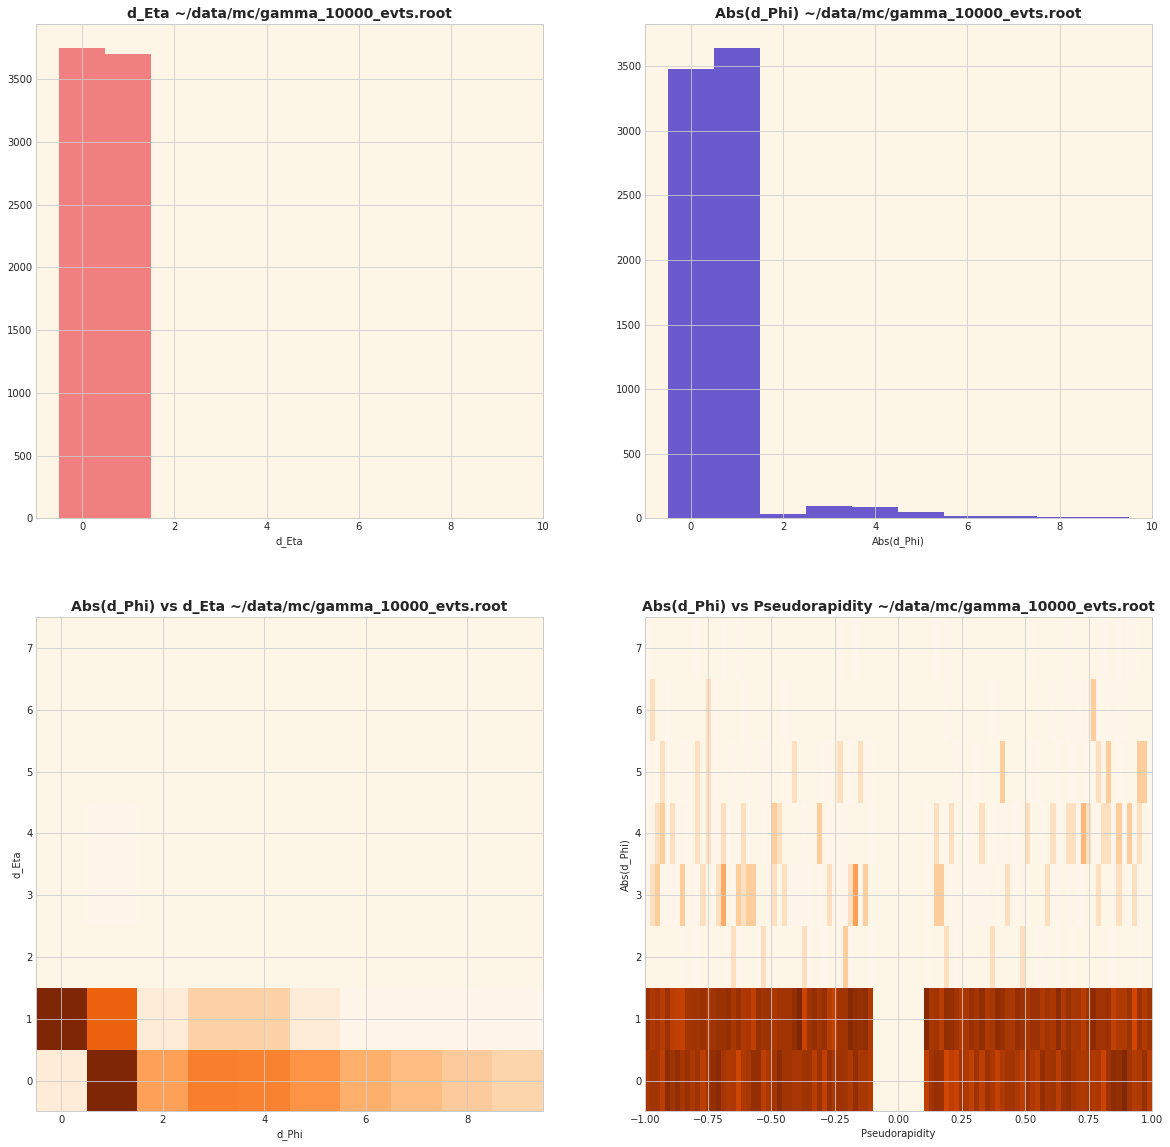

In [51]:
eta_lo = 0.1
eta_hi = 1.00

infile = '~/data/mc/gamma_10000_evts.root'
file   = uproot3.open(infile)

dir         = file['ttree']

px = dir['truthpar_px'].array()
py = dir['truthpar_py'].array()
pz = dir['truthpar_pz'].array()

e_tow   = dir['emcalen'].array()
eta_tow = dir['emcalet'].array()
phi_tow = dir['emcalph'].array()


etas = np.array([])
phis = np.array([])
for i in range(200):
    etas = np.append(etas, [eta_tow[i]])
    phis = np.append(phis, [phi_tow[i]])

unique_etas = np.unique(etas)
unique_phis = np.unique(phis)

print(unique_etas.size, unique_phis.size)



d_phi = []
d_eta = []

etas  = []

toDo = 10000
for i in range(toDo):
    etarap = pseudorap([px[i], py[i], pz[i]])
    if abs(etarap) < eta_lo or abs(etarap) > eta_hi: continue

    sorted = np.sort(e_tow[i])

    maxval = sorted[-1]
    second = sorted[-2] 

    i1 = np.where(e_tow[i] == maxval)
    i2 = np.where(e_tow[i] == second)

    phi_one = angle_index(phi_tow[i][i1[0][0]], unique_phis)
    phi_two = angle_index(phi_tow[i][i2[0][0]], unique_phis)

    delta_phi = abs(phi_one - phi_two)
    delta_phi = delta_phi - 256*(delta_phi//256)

    if delta_phi > 128: delta_phi = 256 - delta_phi

    d_phi.append(delta_phi)

    eta_one = angle_index(eta_tow[i][i1[0][0]], unique_etas)
    eta_two = angle_index(eta_tow[i][i2[0][0]], unique_etas)

    d_eta.append(abs(eta_one-eta_two))

    etas.append(etarap)


#print(np.array2string(unique_etas, separator=","))
#print(np.array2string(unique_phis, separator=","))


fig, axs = plt.subplots(2,2)

for j in range(2):
    for k in range(2):
        axs[j,k].grid(False)


_ = axs[0,0].hist(d_eta, bins=10, range=(-0.5, 9.5), color='lightcoral')
axs[0,0].set_title('d_Eta '+ infile, fontsize=14, fontweight='bold')
axs[0,0].set_xlabel('d_Eta')

_ = axs[0,1].hist(d_phi, bins=10, range=(-0.5, 9.5), color='slateblue')
axs[0,1].set_title('Abs(d_Phi) '+ infile, fontsize=14, fontweight='bold')
axs[0,1].set_xlabel('Abs(d_Phi)')

_ = axs[1,0].hist2d(d_phi, d_eta, bins=(10,8), range=((-0.5, 9.5), (-0.5, 7.5)), norm=colors.LogNorm(1.0), cmap='Oranges')
axs[1,0].set_title('Abs(d_Phi) vs d_Eta '+ infile, fontsize=14, fontweight='bold')
axs[1,0].set_xlabel('d_Phi')
axs[1,0].set_ylabel('d_Eta')


_ = axs[1,1].hist2d(etas, d_phi, bins=((100, 8)), range=((-1,1), (-0.5,7.5)), norm=colors.LogNorm(1.0), cmap='Oranges')
axs[1,1].set_title('Abs(d_Phi) vs Pseudorapidity '+ infile, fontsize=14, fontweight='bold')
axs[1,1].set_xlabel('Pseudorapidity')
axs[1,1].set_ylabel('Abs(d_Phi)')


for j in range(2):
    for k in range(2):
        axs[j,k].xaxis.set_zorder(10.0)
        axs[j,k].yaxis.set_zorder(10.0)
        axs[j,k].set_facecolor("oldlace")
        axs[j,k].grid(True)

    # barrel = np.zeros(shape, dtype=float)

    # content = zip(eta_tow[i], phi_tow[i], e_tow[i])

    # for element in content:
    #     barrel[angle_index(element[0], unique_etas), angle_index(element[1], unique_phis)] = element[1]


# for phi in unique_phis: print(angle_index(phi, unique_phis), phi)
# for eta in unique_etas:print(angle_index(eta, unique_etas), eta)




In [ ]:
phi_q       = math.pi/128.0
phi_bins    = np.arange(-math.pi+phi_q*0.5, math.pi-phi_q*0.5, phi_q)
print(phi_bins)





[-3.12932081 -3.10477711 -3.08023342 -3.05568973 -3.03114604 -3.00660234
 -2.98205865 -2.95751496 -2.93297127 -2.90842757 -2.88388388 -2.85934019
 -2.8347965  -2.8102528  -2.78570911 -2.76116542 -2.73662173 -2.71207803
 -2.68753434 -2.66299065 -2.63844696 -2.61390326 -2.58935957 -2.56481588
 -2.54027218 -2.51572849 -2.4911848  -2.46664111 -2.44209741 -2.41755372
 -2.39301003 -2.36846634 -2.34392264 -2.31937895 -2.29483526 -2.27029157
 -2.24574787 -2.22120418 -2.19666049 -2.1721168  -2.1475731  -2.12302941
 -2.09848572 -2.07394203 -2.04939833 -2.02485464 -2.00031095 -1.97576725
 -1.95122356 -1.92667987 -1.90213618 -1.87759248 -1.85304879 -1.8285051
 -1.80396141 -1.77941771 -1.75487402 -1.73033033 -1.70578664 -1.68124294
 -1.65669925 -1.63215556 -1.60761187 -1.58306817 -1.55852448 -1.53398079
 -1.5094371  -1.4848934  -1.46034971 -1.43580602 -1.41126232 -1.38671863
 -1.36217494 -1.33763125 -1.31308755 -1.28854386 -1.26400017 -1.23945648
 -1.21491278 -1.19036909 -1.1658254  -1.14128171 -1.

In [7]:
import pstats


eta_lo = 0.024
eta_hi = 1.1

total_energy    = []
etas            = []
pts             = []
ptotal          = []

for i in range(Nentries): # loop over the data sample
    etarap = pseudorap(p[i])
    if abs(etarap) < eta_lo or abs(etarap) > eta_hi: continue

    ntowers = nlive[i]
    e = energy[i]

    en = 0.0
    for nt in range(ntowers):
        en+=e[nt]

    total_energy.append(en)
    etas.append(etarap)
    pts.append(pT(p[i]))
    ptotal.append(pTot(p[i]))

#print(len(total_energy))


/tmp/ipykernel_9879/2396643572.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  _ = axs[1,1].hist2d(etas, total_energy, bins=(100,100), norm=colors.LogNorm(1.0), cmap='plasma')


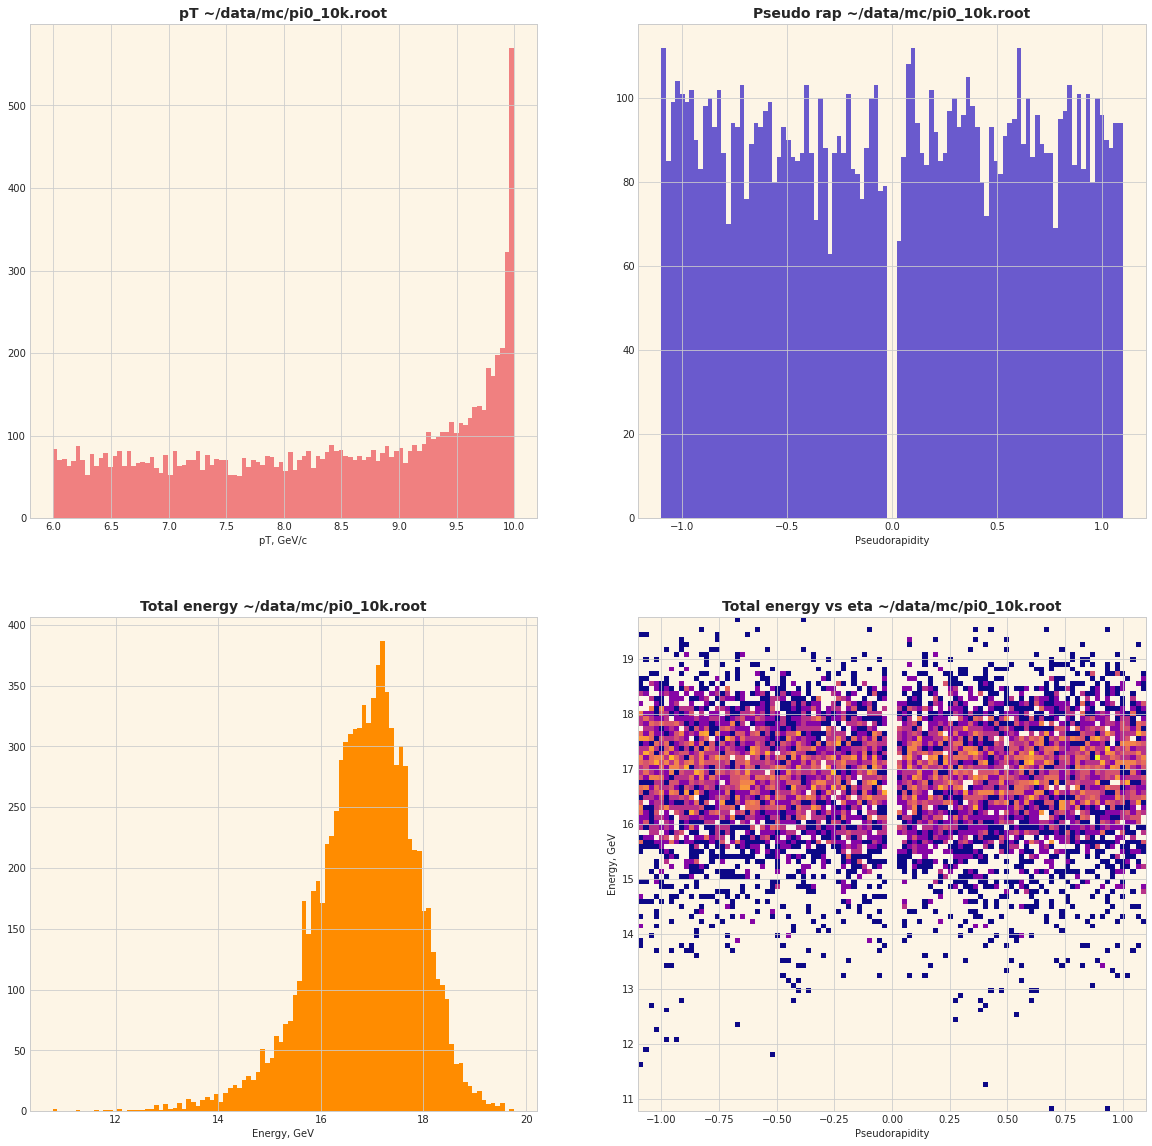

In [8]:
fig, axs = plt.subplots(2,2)

_ = axs[0,0].hist(pts, bins=100, color='lightcoral')
axs[0,0].set_title('pT '+ infile, fontsize=14, fontweight='bold')
axs[0,0].set_xlabel('pT, GeV/c')


_ = axs[0,1].hist(etas, bins=100, color='slateblue')
axs[0,1].set_title('Pseudo rap '+ infile, fontsize=14, fontweight='bold')
axs[0,1].set_xlabel('Pseudorapidity')

_ = axs[1,0].hist(total_energy, bins=100, color='darkorange')
axs[1,0].set_title('Total energy '+ infile, fontsize=14, fontweight='bold')
axs[1,0].set_xlabel('Energy, GeV')

_ = axs[1,1].hist2d(etas, total_energy, bins=(100,100), norm=colors.LogNorm(1.0), cmap='plasma')
axs[1,1].set_title('Total energy vs eta '+ infile, fontsize=14, fontweight='bold')
axs[1,1].set_xlabel('Pseudorapidity')
axs[1,1].set_ylabel('Energy, GeV')

for j in range(2):
    for k in range(2):
        axs[j,k].xaxis.set_zorder(10.0)
        axs[j,k].yaxis.set_zorder(10.0)
        axs[j,k].set_facecolor("oldlace")
        axs[j,k].grid(True)



0.2566886866531762
15143 (59, 39)
705.4852843284607 (array([59]), array([31]))
718.8931703567505 (array([58]), array([24]))
1885.4562044143677 (array([59]), array([38]))
3673.6481189727783 (array([58]), array([23]))
3785.48002243042 (array([59]), array([39]))


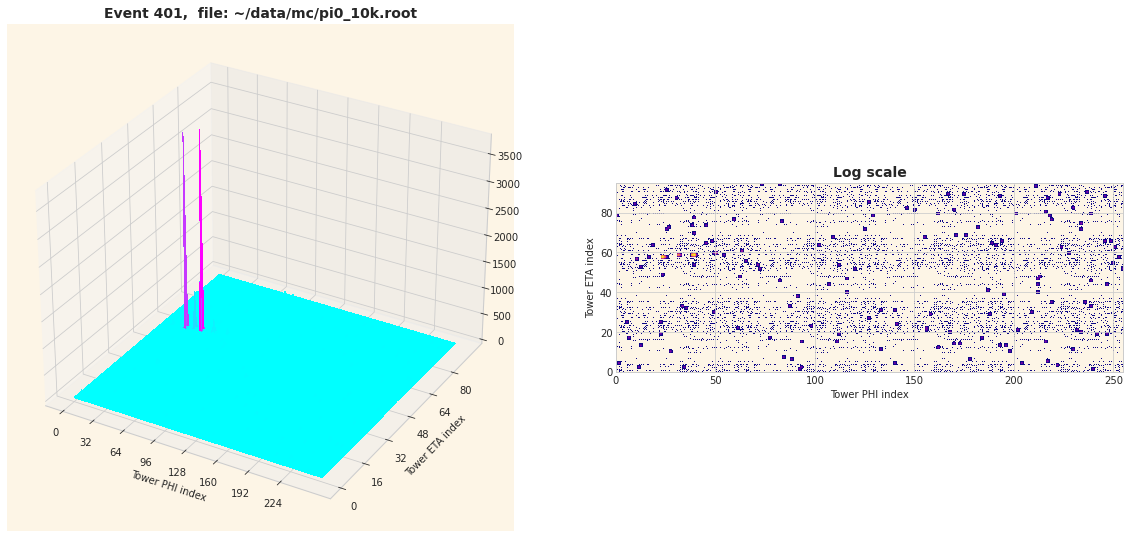

In [9]:
from matplotlib import cm
from numpy import unravel_index

plt.rcParams["figure.figsize"]  = (20.0, 10.0)
#plt.rcParams["image.origin"]    = 'lower'

fig = plt.figure()
figsize=plt.figaspect(1.0)

ax = fig.add_subplot(1, 2, 1, projection='3d')

barrel = np.zeros(shape, dtype=float)

ax.set_yticks(np.arange(0, shape[0], 16))
ax.set_xticks(np.arange(0, shape[1], 32))


i = 401

ntowers = nlive[i]
print(pseudorap(p[i]))

for nt in range(ntowers):
    my_tower = N[i][nt]    # print(myTower, e[nt])

    my_eta = tower_map[my_tower][0]
    my_phi = tower_map[my_tower][1]
    barrel[my_eta][my_phi] = 1000.0*energy[i][nt]
    # print(my_eta, my_phi, energy[i][nt])


maxlocation = unravel_index(barrel.argmax(), shape)
print(barrel.argmax(), maxlocation)

flat = barrel.flatten()
flat.sort()

for val in flat[-5:]:
    indices = np.where(barrel == val)
    print(val, indices)


X = range(256)
Y = range(96)
X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(X, Y, barrel, rstride=1, cstride=1, cmap=cm.cool, linewidth=0, antialiased=False)
ax.set_title('Event '+ str(i)+ ',  file: '+ infile, fontsize=14, fontweight='bold')
ax.set_xlabel('Tower PHI index')
ax.set_ylabel('Tower ETA index')
ax.set_facecolor("oldlace")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(barrel, extent=(0.0, 255.0, 0.0, 95.0),  norm=colors.LogNorm(10.0), cmap='plasma')
ax.set_title('Log scale', fontsize=14, fontweight='bold')
ax.set_xlabel('Tower PHI index')
ax.set_ylabel('Tower ETA index')
ax.set_facecolor("oldlace")
plt.show()



Nentries  10000


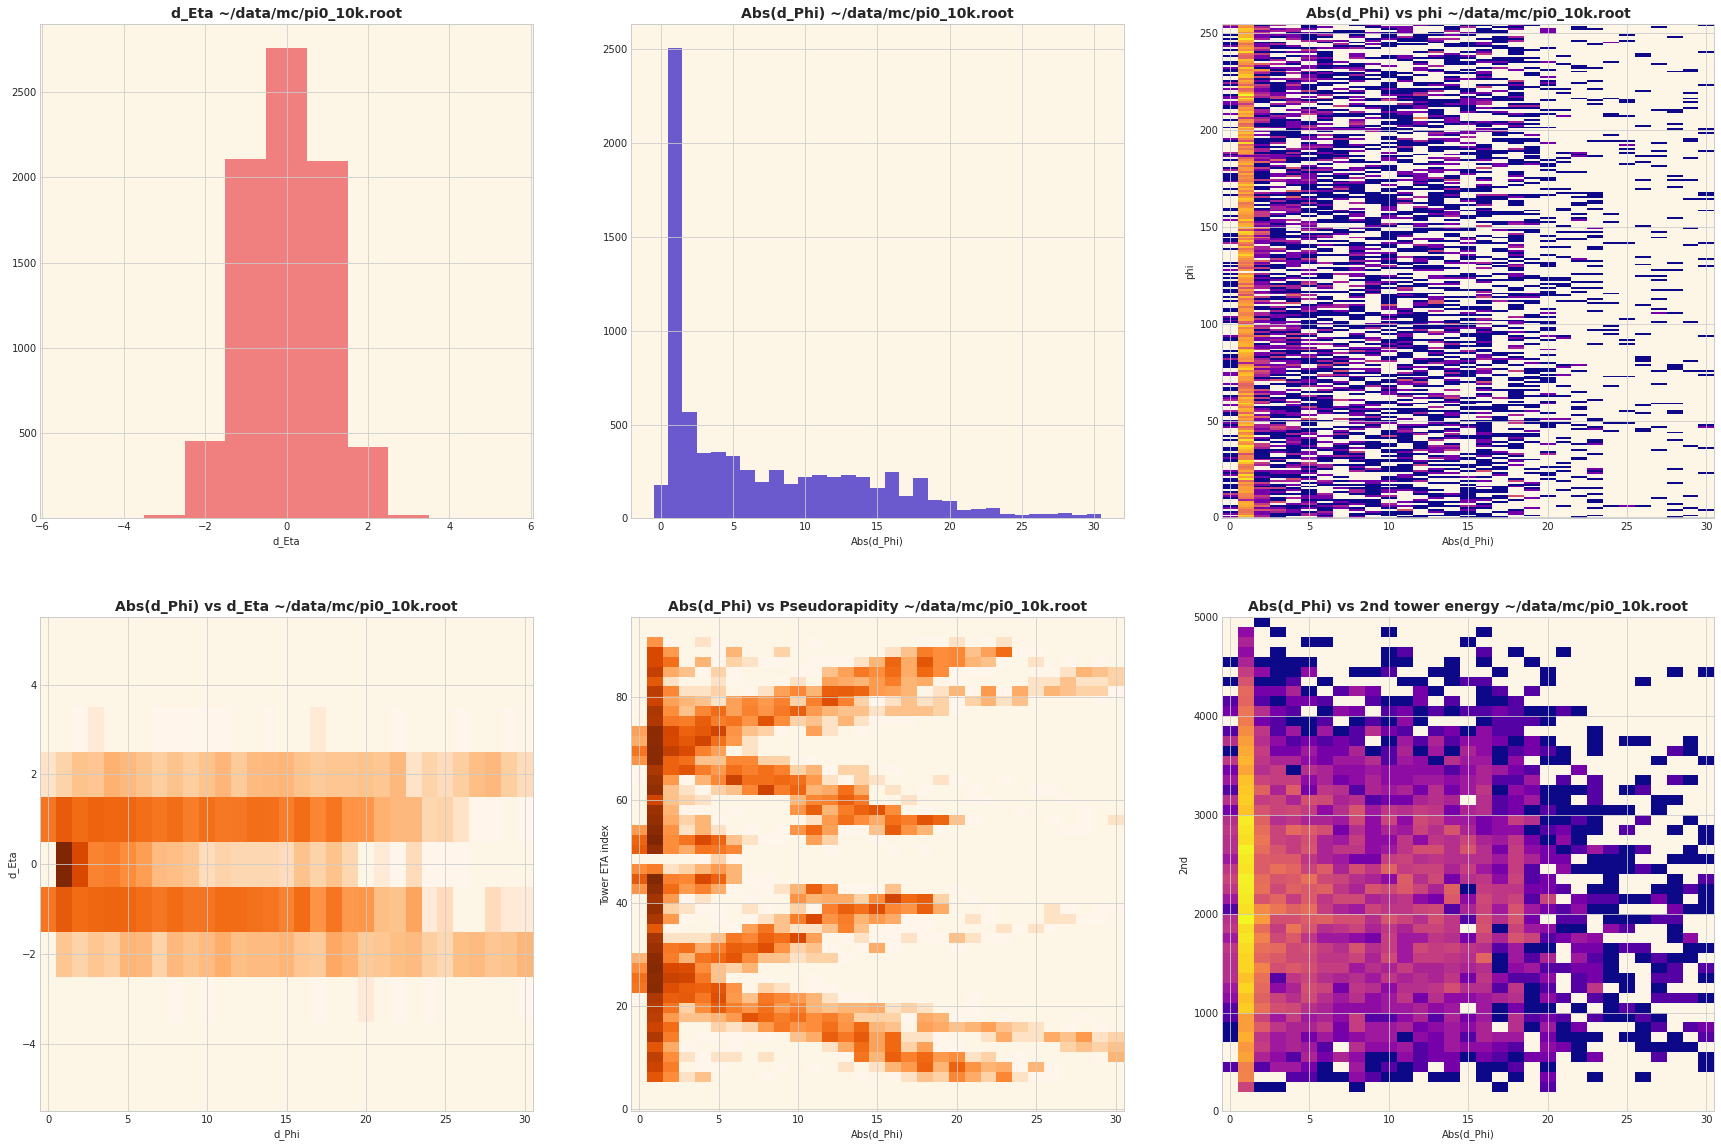

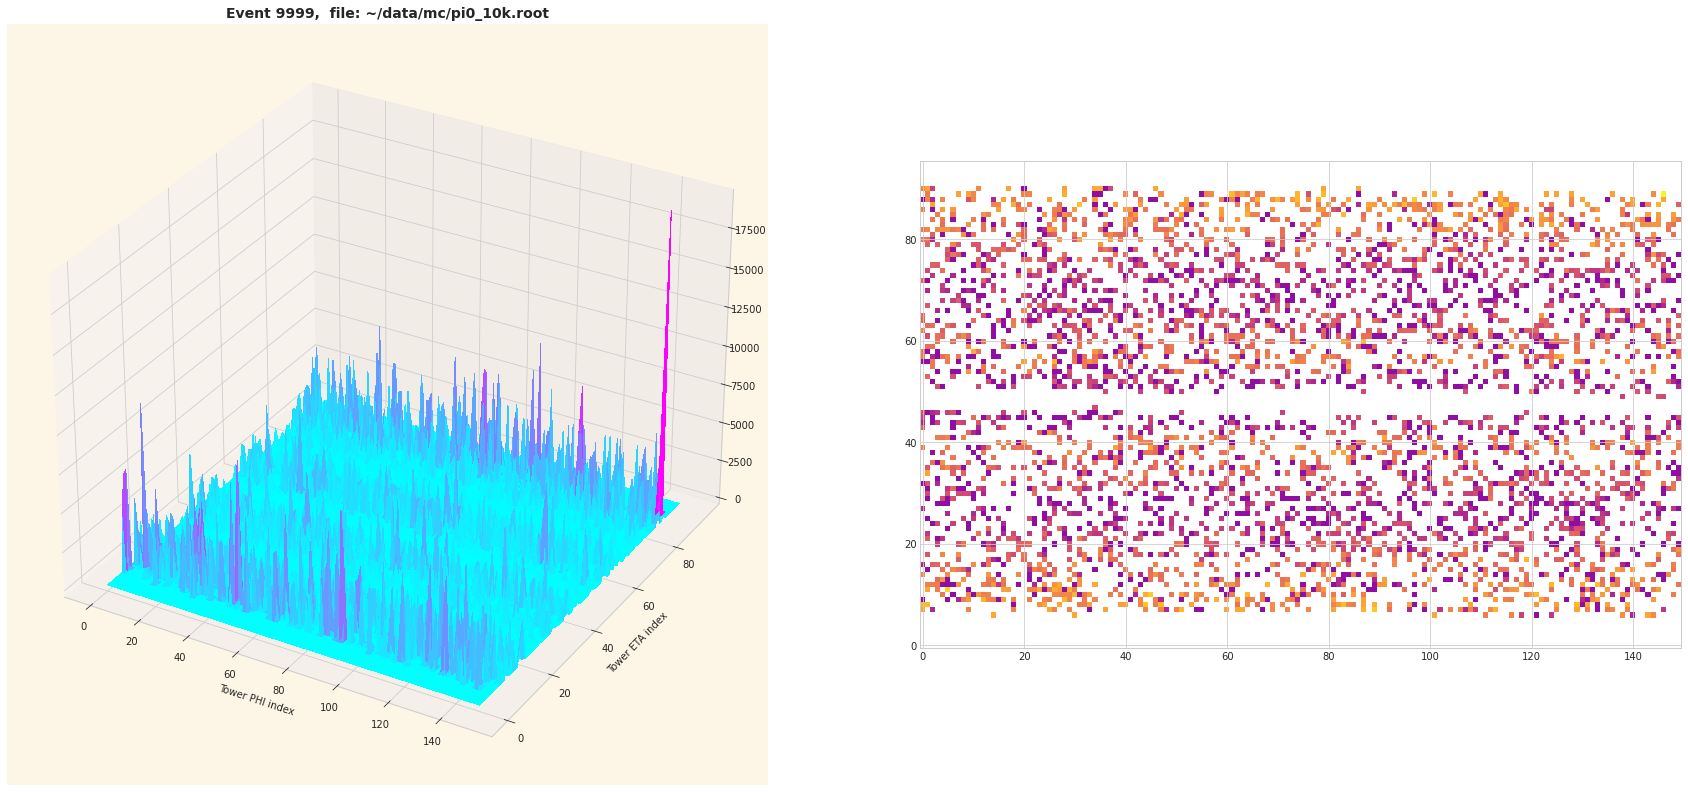

In [37]:
# import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]  = (30.0, 20.0)

eta_lo = 0.05
eta_hi = 1.00

barrel_phi = np.zeros(shape, dtype=int)

d_eta   = []
d_phi   = []
etas    = []

phis    = []
seconds = []

toDo = Nentries
print('Nentries ', Nentries)
# toDo = 10
for i in range(toDo): # loop over the data sample
    etarap = pseudorap(p[i])
    if abs(etarap) < eta_lo or abs(etarap) > eta_hi: continue
    
    barrel = np.zeros(shape, dtype=float)

    ntowers = nlive[i]

    for nt in range(ntowers):
        my_tower    = N[i][nt]    # print(myTower, e[nt])

        my_eta = tower_map[my_tower][0]
        my_phi = tower_map[my_tower][1]

        # print(my_tower, my_eta, my_phi)
        barrel[my_eta][my_phi] = 1000.0*energy[i][nt]

    flat = barrel.flatten()
    flat.sort()

    maxval = flat[-1] # np.amax(flat)
    second = flat[-2] # np.partition(flat, -2)[-2]
    # if second < 500.0: continue

    # print(maxval, flat[-1], second, flat[-2])

    indices1 = np.where(barrel == maxval)
    indices2 = np.where(barrel == second)

    # print(maxval, second, indices1, indices2)


    d_eta.append(indices1[0][0] - indices2[0][0])

    d_phi_candidate = abs(indices1[1][0] - indices2[1][0])
    if d_phi_candidate > 128:
        d_phi_candidate = 256 - d_phi_candidate
    d_phi.append(d_phi_candidate)


    abs_phi = abs(indices1[1][0] - indices2[1][0])
    barrel_phi[indices1[0][0],indices1[1][0]]+=100*abs_phi

    phiA = phiAngle(p[i])

    # etas.append(etarap)

    etas.append(indices1[0][0])
    phis.append(indices1[1][0]) # (phiA)
    seconds.append(second)

    #for val in flat[-2:]:
    #    indices = np.where(barrel == val)
    #    print(val, indices)


fig, axs = plt.subplots(2,3)

for j in range(2):
    for k in range(3):
        axs[j,k].grid(False)

_ = axs[0,0].hist(d_eta, bins=11, range=(-5.5, 5.5), color='lightcoral')
axs[0,0].set_title('d_Eta '+ infile, fontsize=14, fontweight='bold')
axs[0,0].set_xlabel('d_Eta')

_ = axs[0,1].hist(d_phi, bins=31, range=(-0.5, 30.5), color='slateblue')
axs[0,1].set_title('Abs(d_Phi) '+ infile, fontsize=14, fontweight='bold')
axs[0,1].set_xlabel('Abs(d_Phi)')

_ = axs[1,0].hist2d(d_phi, d_eta, bins=(31,11), range=((-0.5, 30.5), (-5.5, 5.5)), norm=colors.LogNorm(1.0), cmap='Oranges')
axs[1,0].set_title('Abs(d_Phi) vs d_Eta '+ infile, fontsize=14, fontweight='bold')
axs[1,0].set_xlabel('d_Phi')
axs[1,0].set_ylabel('d_Eta')

_ = axs[1,1].hist2d(d_phi, etas, bins=(31,50), range=((-0.5, 30.5), (-0.5, 95.5)), norm=colors.LogNorm(1.0), cmap='Oranges')
axs[1,1].set_title('Abs(d_Phi) vs Pseudorapidity '+ infile, fontsize=14, fontweight='bold')
axs[1,1].set_xlabel('Abs(d_Phi)')
axs[1,1].set_ylabel('Tower ETA index')


_ = axs[0,2].hist2d(d_phi, phis, bins=(31,256), range=((-0.5, 30.5), (-0.5, 254.5)), norm=colors.LogNorm(1.0), cmap='plasma')
axs[0,2].set_title('Abs(d_Phi) vs phi '+ infile, fontsize=14, fontweight='bold')
axs[0,2].set_xlabel('Abs(d_Phi)')
axs[0,2].set_ylabel('phi')

_ = axs[1,2].hist2d(d_phi, seconds, bins=(31,50), range=((-0.5, 30.5), (0, 5000.)), norm=colors.LogNorm(1.0), cmap='plasma')
axs[1,2].set_title('Abs(d_Phi) vs 2nd tower energy '+ infile, fontsize=14, fontweight='bold')
axs[1,2].set_xlabel('Abs(d_Phi)')
axs[1,2].set_ylabel('2nd')

for j in range(2):
    for k in range(3):
        axs[j,k].xaxis.set_zorder(10.0)
        axs[j,k].yaxis.set_zorder(10.0)
        axs[j,k].set_facecolor("oldlace")
        axs[j,k].grid(True)



fig = plt.figure()
figsize=plt.figaspect(1.0)

ax = fig.add_subplot(1, 2, 1, projection='3d')


X = range(150)
Y = range(96)
X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(X, Y, barrel_phi[:, 50:200], rstride=1, cstride=1, cmap=cm.cool, linewidth=0, antialiased=False)
ax.set_title('Event '+ str(i)+ ',  file: '+ infile, fontsize=14, fontweight='bold')
ax.set_xlabel('Tower PHI index')
ax.set_ylabel('Tower ETA index')
ax.set_facecolor("oldlace")

ax = fig.add_subplot(1, 2, 2)
#ax.imshow(barrel_phi, extent=(0.0, 255.0, 0.0, 95.0),  norm=colors.LogNorm(10.0), cmap='plasma')
#ax.set_title('Log scale', fontsize=14, fontweight='bold')
#ax.set_xlabel('Tower PHI index')
#ax.set_ylabel('Tower ETA index')
#ax.set_facecolor("oldlace")
#plt.show()

ax.imshow(barrel_phi[:, 50:200], norm=colors.LogNorm(10.0), cmap='plasma')
# print(barrel_phi)
# surf = ax.plot_surface(eta, phis, d_phi, rstride=1, cstride=1, cmap=cm.cool, linewidth=0, antialiased=False)

Nentries  10000


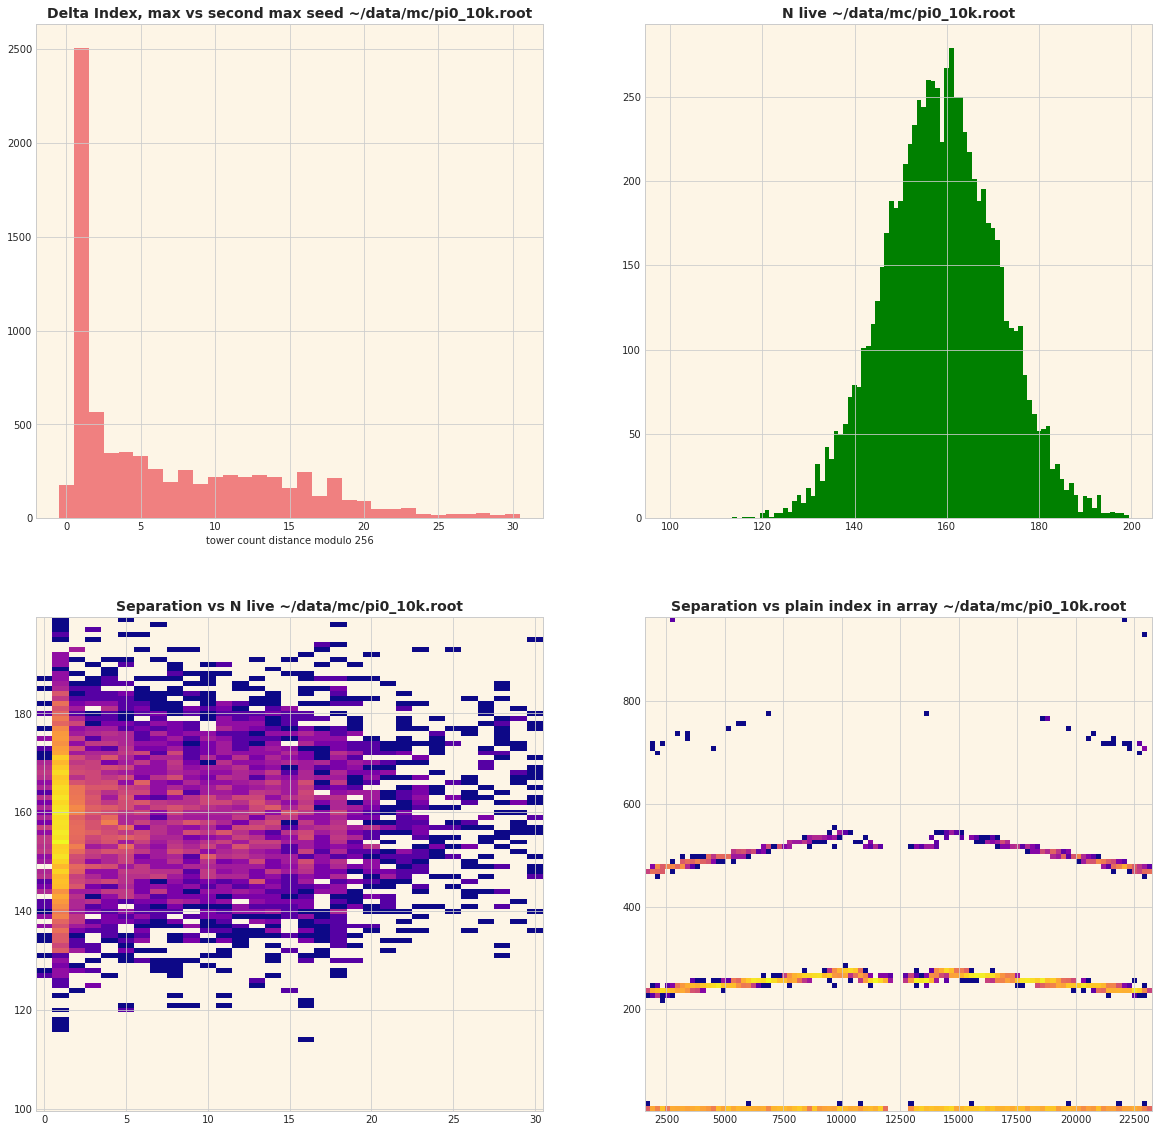

In [58]:
########################### AUX AUX AUX



plt.rcParams["figure.figsize"]  = (20.0, 20.0)

eta_lo = 0.05
eta_hi = 1.00



d_eta   = []
d_phi   = []
etas    = []

phis    = []

ones    = []
twos    = []

nts     = []

toDo = Nentries
print('Nentries ', Nentries)
# toDo = 10

d_phi = []

for i in range(toDo): # loop over the data sample
    etarap = pseudorap(p[i])
    if abs(etarap) < eta_lo or abs(etarap) > eta_hi: continue
    
    energies = np.zeros(Ntotal, dtype=float)

    ntowers = nlive[i]

    nts.append(ntowers)

    for nt in range(ntowers):
        my_tower    = N[i][nt]    # print(myTower, e[nt])
        energies[my_tower] = energy[i][nt]

    sorted = np.sort(energies)

    maxval = sorted[-1]
    second = sorted[-2] 

    i1 = np.where(energies == maxval)
    i2 = np.where(energies == second)

    one = i1[0][0]
    two = i2[0][0]

    ones.append(one)
    twos.append(two)

    delta = abs(one - two)
    #if delta > 128:
    #    delta = 256 - delta
   
    delta = delta - 256*(delta//256)


    if delta > 128: delta = 256 - delta

    d_phi.append(delta)
    #if delta>250:
    #    print(delta)

fig, axs = plt.subplots(2,2)

for j in range(2):
    for k in range(2):
        axs[j,k].grid(False)

_ = axs[0,0].hist(d_phi, bins=31, range=(-0.5, 30.5), color='lightcoral')
axs[0,0].set_title('Delta Index, max vs second max seed '+ infile, fontsize=14, fontweight='bold')
axs[0,0].set_xlabel('tower count distance modulo 256')

_ = axs[0,1].hist(nts, bins=100, range=(99.5, 199.5), color='green')
axs[0,1].set_title('N live '+ infile, fontsize=14, fontweight='bold')

_ = axs[1,0].hist2d(d_phi, nts, bins=(31, 100), range=((-0.5, 30.5), (99.5, 199.5)), norm=colors.LogNorm(1.0), cmap='plasma')
axs[1,0].set_title('Separation vs N live '+ infile, fontsize=14, fontweight='bold')

_ = axs[1,1].hist2d(np.array(ones), abs(np.array(ones)-np.array(twos)), bins=(100,100), norm=colors.LogNorm(1.0), cmap='plasma')
axs[1,1].set_title('Separation vs plain index in array '+ infile, fontsize=14, fontweight='bold')

for j in range(2):
    for k in range(2):
        axs[j,k].xaxis.set_zorder(10.0)
        axs[j,k].yaxis.set_zorder(10.0)
        axs[j,k].set_facecolor("oldlace")
        axs[j,k].grid(True)
